In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.graphics.gofplots import qqplot

# Carregar datasets
saneamento = pd.read_csv("Documents/dataset_saneamento_estado.csv")
dengue = pd.read_csv("Documents/dataset_dengue.csv")

In [2]:
populacao = pd.read_csv("Documents/SP_mun_população.csv")

In [3]:
# Conferir colunas disponíveis
print(saneamento.columns)
print(dengue.columns)

Index(['CD_MUN', 'NM_MUN_x', 'V00001', 'V00002', 'V00003', 'V00004', 'V00005',
       'V00006', 'V00007', 'V00047',
       ...
       'V00612', 'V00613', 'V00614', 'V00615', 'V00616', 'V00617', 'V00636',
       'V00637', 'V00638', 'V00639'],
      dtype='object', length=101)
Index(['CD_MUN', 'NM_MUN_x', 'DRS__0_level_1__0', 'DRS__1_level_1__1',
       'GVE__2_level_1__2', 'GVE__3_level_1__3',
       'Região_de_Saúde__4_level_1__4', 'Região_de_Saúde__5_level_1__5',
       'Janeiro_notificados__7', 'Janeiro_confirmados_autóctones',
       'Janeiro_confirmados_importados', 'Fevereiro_notificados__10',
       'Fevereiro_confirmados_autóctones', 'Fevereiro_confirmados_importados',
       'Março_notificados__13', 'Março_confirmados_autóctones',
       'Março_confirmados_importados', 'Abril_notificados__16',
       'Abril_confirmados_autóctones', 'Abril_confirmados_importados',
       'Maio_notificados__19', 'Maio_confirmados_autóctones',
       'Maio_confirmados_importados', 'Junho_notificad

In [4]:
# Fazer o merge (união) dos dados
dados = pd.merge(dengue, saneamento, on="CD_MUN", how="inner")

dados.head()

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00612,V00613,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,33127,877,263,37,0,189,27,1047,0,75
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,4186,83,78,4,0,0,186,324,9,36
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,29194,1081,1242,64,4,413,232,2030,19,326
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,6866,283,96,0,0,13,79,662,15,86
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,16777,882,95,6,0,29,364,715,20,72


In [5]:
# Descrição do novo conjunto de dados
dados.describe()

,CD_MUN,DRS__0_level_1__0,Região_de_Saúde__4_level_1__4,Janeiro_notificados__7,Janeiro_confirmados_autóctones,Janeiro_confirmados_importados,Fevereiro_notificados__10,Fevereiro_confirmados_autóctones,Fevereiro_confirmados_importados,Março_notificados__13,...,V00612,V00613,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639
count,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.00000,644.000000,644.000000
mean,3.528653e+06,9.709627,35099.706522,36.725155,11.793478,0.454969,43.951863,23.833851,0.543478,150.649068,...,6.140737e+04,6365.012422,464.855590,26.444099,81.251553,102.037267,606.215839,2382.77795,66.723602,298.498447
std,1.667514e+04,4.998087,50.236262,128.792915,58.663412,2.441761,144.961246,95.940780,2.232860,487.817762,...,4.228468e+05,43660.917802,556.217686,42.625590,939.421608,382.244239,2106.284817,4632.98698,260.946002,678.658528
min,3.500105e+06,1.000000,35011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.514576e+06,6.000000,35062.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,4.687750e+03,133.000000,128.750000,4.000000,0.000000,7.000000,58.000000,466.00000,3.000000,49.000000
50%,3.528650e+06,9.000000,35095.000000,5.000000,0.500000,0.000000,7.000000,1.000000,0.000000,25.000000,...,1.112850e+04,421.500000,264.500000,14.000000,3.000000,33.000000,192.000000,1010.00000,17.000000,112.000000
75%,3.543130e+06,15.000000,35153.000000,21.000000,3.250000,0.000000,26.500000,10.000000,0.000000,96.750000,...,3.576775e+04,1679.000000,604.750000,30.000000,12.250000,97.250000,523.500000,2563.00000,54.000000,305.000000
max,3.557204e+06,17.000000,35174.000000,1861.000000,1035.000000,40.000000,2106.000000,1356.000000,33.000000,6969.000000,...,1.043332e+07,923195.000000,4992.000000,513.000000,23226.000000,7757.000000,38436.000000,64836.00000,5245.000000,11187.000000


In [6]:
# Merge (união) com o conjunto de dados que possui a população de cada município
dados_pop = pd.merge(dados, populacao, on="CD_MUN", how="inner")

dados_pop.head()

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00637,V00638,V00639,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,NM_MUN,Total_setores,População
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,1047,0,75,3,Sudeste,35,São Paulo,Adamantina,107,34687
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,324,9,36,3,Sudeste,35,São Paulo,Adolfo,16,4351
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,2030,19,326,3,Sudeste,35,São Paulo,Aguaí,63,32072
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,662,15,86,3,Sudeste,35,São Paulo,Águas da Prata,24,7369
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,715,20,72,3,Sudeste,35,São Paulo,Águas de Lindóia,49,17930


In [7]:
# Remover colunas constantes
dados_pop = dados_pop.loc[:, dados_pop.nunique() > 1]

# Criação do coeficiente de incidência de dengue (dividindo o total de casos autóctones de dengue no município
# por sua população)
dados_pop['Total_autoctone_ponderado'] = dados_pop['Total_confirmados_autóctones'] / dados_pop['População']
alvo = "Total_autoctone_ponderado"

# Conferir o resultado
dados_pop[['Total_confirmados_autóctones', 'População'] + ['Total_autoctone_ponderado']].head()

,Total_confirmados_autóctones,População,Total_autoctone_ponderado
0,1357,34687,0.039121
1,176,4351,0.040450
2,5,32072,0.000156
3,0,7369,0.000000
4,11,17930,0.000613


In [8]:
# Eliminação de algumas colunas redundantes ou não relevantes
dados
dados_pop.drop(['NM_MUN', 'Total_setores'], axis=1)

,CD_MUN,NM_MUN_x_x,DRS__0_level_1__0,DRS__1_level_1__1,GVE__2_level_1__2,GVE__3_level_1__3,Região_de_Saúde__4_level_1__4,Região_de_Saúde__5_level_1__5,Janeiro_notificados__7,Janeiro_confirmados_autóctones,...,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639,População,Total_autoctone_ponderado
0,3500105,Adamantina,9,Marília,XIX,MARÍLIA,35091.0,ADAMANTINA,23,9,...,263,37,0,189,27,1047,0,75,34687,0.039121
1,3500204,Adolfo,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,102,49,...,78,4,0,0,186,324,9,36,4351,0.040450
2,3500303,Aguaí,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,9,2,...,1242,64,4,413,232,2030,19,326,32072,0.000156
3,3500402,Águas da Prata,14,São João da Boa Vista,XXVI,SÃO JOÃO DA BOA VISTA,35142.0,MANTIQUEIRA,0,0,...,96,0,0,13,79,662,15,86,7369,0.000000
4,3500501,Águas de Lindóia,7,Campinas,XVII,CAMPINAS,35074.0,CIRCUITO DAS AGUAS,1,0,...,95,6,0,29,364,715,20,72,17930,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,3556958,Vitória Brasil,15,São José do Rio Preto,XXX,JALES,35153.0,JALES,24,24,...,114,0,0,0,16,253,0,17,1794,0.045708
640,3557006,Votorantim,16,Sorocaba,XXXI,SOROCABA,35163.0,SOROCABA,132,0,...,207,4,10,134,231,3791,12,622,127923,0.005128
641,3557105,Votuporanga,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35157.0,VOTUPORANGA,1077,586,...,974,61,17,174,322,2526,14,243,96634,0.104021
642,3557154,Zacarias,15,São José do Rio Preto,XXIX,SÃO JOSÉ DO RIO PRETO,35156.0,JOSÉ BONIFÁCIO,5,1,...,216,26,0,176,53,510,0,59,2692,0.044205


In [9]:
# Variáveis de saneamento - Domicílios com determinadas características com relação a água, lixo e esgoto
cols_saneamento = [col for col in dados_pop.columns if col.startswith('V00')]
# Criar novas colunas com os índices (divisão pelo total de domicílios)
for col in cols_saneamento:
    dados_pop[f'{col}_idx'] = dados_pop[col] / dados_pop['V00004']
    
# Selecionar as colunas indexadas para análise
cols_saneamento_idx = [f'{col}_idx' for col in cols_saneamento]

cols_s = cols_saneamento + cols_saneamento_idx

# Verificação
print(cols_s)

['V00001', 'V00002', 'V00003', 'V00004', 'V00005', 'V00006', 'V00007', 'V00047', 'V00048', 'V00049', 'V00050', 'V00052', 'V00111', 'V00112', 'V00113', 'V00114', 'V00115', 'V00116', 'V00117', 'V00118', 'V00119', 'V00120', 'V00121', 'V00122', 'V00123', 'V00124', 'V00125', 'V00126', 'V00127', 'V00128', 'V00129', 'V00130', 'V00131', 'V00132', 'V00133', 'V00134', 'V00135', 'V00136', 'V00137', 'V00138', 'V00139', 'V00140', 'V00141', 'V00142', 'V00199', 'V00200', 'V00201', 'V00309', 'V00310', 'V00311', 'V00312', 'V00313', 'V00314', 'V00315', 'V00316', 'V00397', 'V00398', 'V00399', 'V00400', 'V00401', 'V00402', 'V00463', 'V00464', 'V00465', 'V00466', 'V00467', 'V00468', 'V00469', 'V00470', 'V00508', 'V00509', 'V00510', 'V00511', 'V00512', 'V00513', 'V00514', 'V00515', 'V00540', 'V00541', 'V00542', 'V00580', 'V00581', 'V00582', 'V00583', 'V00584', 'V00585', 'V00586', 'V00587', 'V00612', 'V00613', 'V00614', 'V00615', 'V00616', 'V00617', 'V00636', 'V00637', 'V00638', 'V00639', 'V00001_idx', 'V000

C:\Users\Nazivon Santos\AppData\Local\Temp\ipykernel_22508\4000934050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados_pop[f'{col}_idx'] = dados_pop[col] / dados_pop['V00004']
C:\Users\Nazivon Santos\AppData\Local\Temp\ipykernel_22508\4000934050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados_pop[f'{col}_idx'] = dados_pop[col] / dados_pop['V00004']
C:\Users\Nazivon Santos\AppData\Local\Temp\ipykernel_22508\4000934050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [10]:
# Verificar dados ausentes
print("Dados ausentes nas variáveis de saneamento e alvo:")
print(dados_pop[cols_s + ['Total_autoctone_ponderado']].isna().sum())

Dados ausentes nas variáveis de saneamento e alvo:
V00001                       0
V00002                       0
V00003                       0
V00004                       0
V00005                       0
                            ..
V00636_idx                   0
V00637_idx                   0
V00638_idx                   0
V00639_idx                   0
Total_autoctone_ponderado    0
Length: 197, dtype: int64


In [11]:
# Baixar o conjunto de dados como CSV
dados_pop.to_csv('RP2dados_unidos.csv', index=False)

In [12]:
# Selecionar apenas as colunas numéricas do conjunto de dados
dados_num = dados_pop.select_dtypes(include=['number'])

In [13]:
# Eliminação de algumas colunas não relevantes
dados_num = dados_num.drop(['DRS__0_level_1__0', 'Região_de_Saúde__4_level_1__4'], axis=1)

In [14]:
# Criar um StandardScaler para as variáveis independentes
scaler_X = StandardScaler()
# Normalizar as variáveis de saneamento (índices)
dados_num[cols_saneamento_idx] = scaler_X.fit_transform(dados_num[cols_saneamento_idx])

In [15]:
# Normalizar as variáveis de saneamento (todas)
dados_num[cols_s] = scaler_X.fit_transform(dados_num[cols_s])

In [16]:
# Verificar os dados normalizados
print("\nEstatísticas após normalização (média ~ 0, desvio padrão ~ 1):")
print(dados_num[cols_s].describe())


Estatísticas após normalização (média ~ 0, desvio padrão ~ 1):
             V00001        V00002        V00003        V00004        V00005  \
count  6.440000e+02  6.440000e+02  6.440000e+02  6.440000e+02  6.440000e+02   
mean   2.758318e-18  1.379159e-17  5.516636e-18  2.758318e-18 -8.274954e-18   
std    1.000777e+00  1.000777e+00  1.000777e+00  1.000777e+00  1.000777e+00   
min   -1.425934e-01 -6.679277e-02 -1.709170e-01 -1.425934e-01 -1.462206e-01   
25%   -1.329457e-01 -6.679277e-02 -1.709170e-01 -1.329457e-01 -1.365850e-01   
50%   -1.171493e-01 -6.679277e-02 -1.481531e-01 -1.171493e-01 -1.203804e-01   
75%   -6.169106e-02 -6.388402e-02 -1.089218e-01 -6.169106e-02 -6.489015e-02   
max    2.456151e+01  2.513071e+01  2.306276e+01  2.456151e+01  2.450949e+01   

             V00006        V00007      V00047        V00048        V00049  \
count  6.440000e+02  6.440000e+02  644.000000  6.440000e+02  6.440000e+02   
mean   1.654991e-17  8.274954e-18    0.000000 -5.516636e-18 -2.758318e

In [17]:
# 1. Correlação
# Calcular a matriz de correlação
correlacao = dados_num[cols_s + ['Total_autoctone_ponderado']].corr()
correlacao_dengue = correlacao['Total_autoctone_ponderado'].dropna().sort_values(ascending=False)

print("\nCorrelação com Incidência de Dengue:")
print(correlacao_dengue)


Correlação com Incidência de Dengue:
Total_autoctone_ponderado    1.000000
V00120_idx                   0.261517
V00112_idx                   0.249106
V00615_idx                   0.240913
V00509_idx                   0.235592
                               ...   
V00122_idx                  -0.237252
V00114_idx                  -0.237738
V00511_idx                  -0.240091
V00540_idx                  -0.322037
V00005_idx                  -0.354583
Name: Total_autoctone_ponderado, Length: 195, dtype: float64


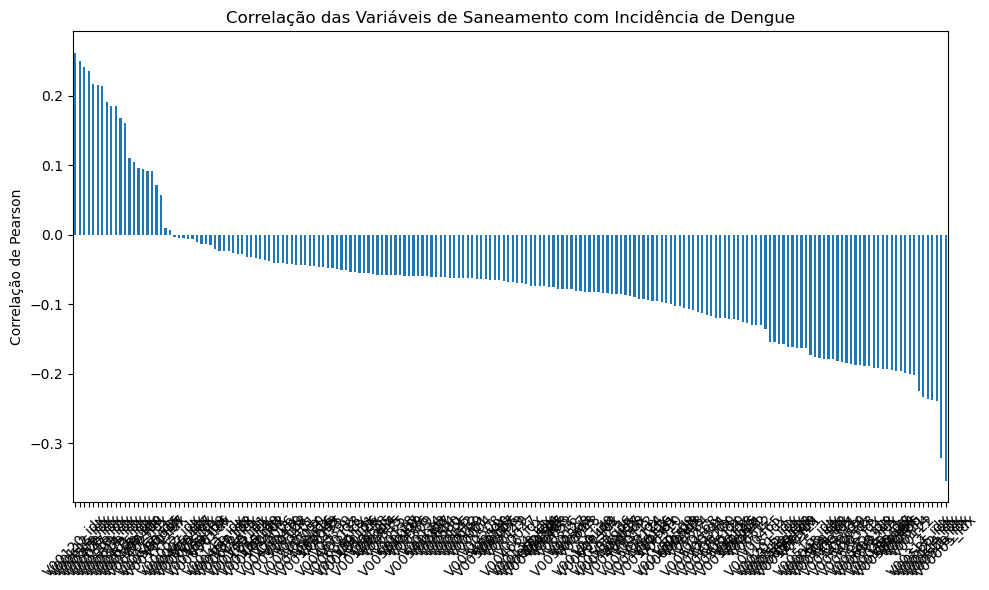

In [18]:
# Visualizar as correlações mais fortes (excluindo a própria variável alvo)
plt.figure(figsize=(10, 6))
correlacao_dengue.drop('Total_autoctone_ponderado').plot(kind='bar')
plt.title('Correlação das Variáveis de Saneamento com Incidência de Dengue')
plt.ylabel('Correlação de Pearson')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# 2. Regressão Simples
print("\nResultados da Regressão Simples para cada variável de saneamento:")
for var in cols_s:
    # Preparar dados para regressão simples
    X_simples = dados_num[[var]]
    y = dados_num['Total_autoctone_ponderado']

    # Ajustar modelo de regressão simples
    modelo_simples = LinearRegression()
    modelo_simples.fit(X_simples, y)
    y_pred_simples = modelo_simples.predict(X_simples)

    # Calcular R²
    r2_simples = r2_score(y, y_pred_simples)

    # Exibir resultado no formato solicitado
    print(f"{var}: {r2_simples:.4f}")


Resultados da Regressão Simples para cada variável de saneamento:
V00001: 0.0040
V00002: 0.0014
V00003: 0.0036
V00004: 0.0040
V00005: 0.0042
V00006: 0.0016
V00007: 0.0034
V00047: 0.0049
V00048: 0.0066
V00049: 0.0022
V00050: 0.0020
V00052: 0.0056
V00111: 0.0038
V00112: 0.0080
V00113: 0.0263
V00114: 0.0405
V00115: 0.0152
V00116: 0.0091
V00117: 0.0042
V00118: 0.0031
V00119: 0.0046
V00120: 0.0145
V00121: 0.0266
V00122: 0.0411
V00123: 0.0147
V00124: 0.0087
V00125: 0.0039
V00126: 0.0030
V00127: 0.0062
V00128: 0.0017
V00129: 0.0044
V00130: 0.0069
V00131: 0.0030
V00132: 0.0007
V00133: 0.0027
V00134: 0.0036
V00135: 0.0023
V00136: 0.0002
V00137: 0.0001
V00138: 0.0034
V00139: 0.0035
V00140: 0.0013
V00141: 0.0010
V00142: 0.0039
V00199: 0.0039
V00200: 0.0143
V00201: 0.0160
V00309: 0.0035
V00310: 0.0095
V00311: 0.0329
V00312: 0.0368
V00313: 0.0112
V00314: 0.0033
V00315: 0.0032
V00316: 0.0061
V00397: 0.0037
V00398: 0.0062
V00399: 0.0023
V00400: 0.0089
V00401: 0.0019
V00402: 0.0069
V00463: 0.0056
V00

In [20]:
# Verificar se a coluna-alvo está presente
if alvo not in dados_num.columns:
    raise ValueError(f"A coluna alvo '{alvo}' não foi encontrada nas colunas numéricas.")

In [21]:
# 3. Regressão Múltipla (sem corte de variáveis)
print("\nAjustando regressão múltipla com todas as variáveis de saneamento")
X_multi = dados_pop[cols_saneamento_idx]  # Usar todas as variáveis de saneamento
modelo_multi = LinearRegression()
modelo_multi.fit(X_multi, y)
y_pred_multi = modelo_multi.predict(X_multi)


Ajustando regressão múltipla com todas as variáveis de saneamento


In [22]:
# Calcular R²
r2_multi = r2_score(y, y_pred_multi)
mae = mean_absolute_error(y, y_pred_multi)
rmse = np.sqrt(mean_squared_error(y, y_pred_multi))

print("\nResultados da Regressão Múltipla:")
print(f"R²: {r2_multi:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Intercepto: {modelo_multi.intercept_:.4f}")


Resultados da Regressão Múltipla:
R²: 0.3783
MAE: 0.0184
RMSE: 0.0267
Intercepto: -5.1889


In [23]:
# Verificar overfitting comparando R²
if r2_multi >= 0.99:
    print("\nAviso: R² muito alto (próximo de 1.0). Possível overfitting. Considere reduzir o número de variáveis ou coletar mais dados.")
    
# Salvar o conjunto de dados processado
dados_pop.to_csv('RP2dados_unidos_estado.csv', index=False)  

In [24]:
import seaborn as sns
import statsmodels.api as sm


Top 10 variáveis mais correlacionadas positivamente:
Total_autoctone_ponderado    1.000000
V00120_idx                   0.261517
V00112_idx                   0.249106
V00615_idx                   0.240913
V00509_idx                   0.235592
V00400_idx                   0.216554
V00047_idx                   0.215581
V00119_idx                   0.213400
V00399_idx                   0.190239
V00614_idx                   0.185174
Name: Total_autoctone_ponderado, dtype: float64

Top 10 variáveis mais correlacionadas negativamente:
V00511       -0.198702
V00114       -0.201329
V00122       -0.202754
V00314_idx   -0.225478
V00585_idx   -0.233312
V00122_idx   -0.237252
V00114_idx   -0.237738
V00511_idx   -0.240091
V00540_idx   -0.322037
V00005_idx   -0.354583
Name: Total_autoctone_ponderado, dtype: float64


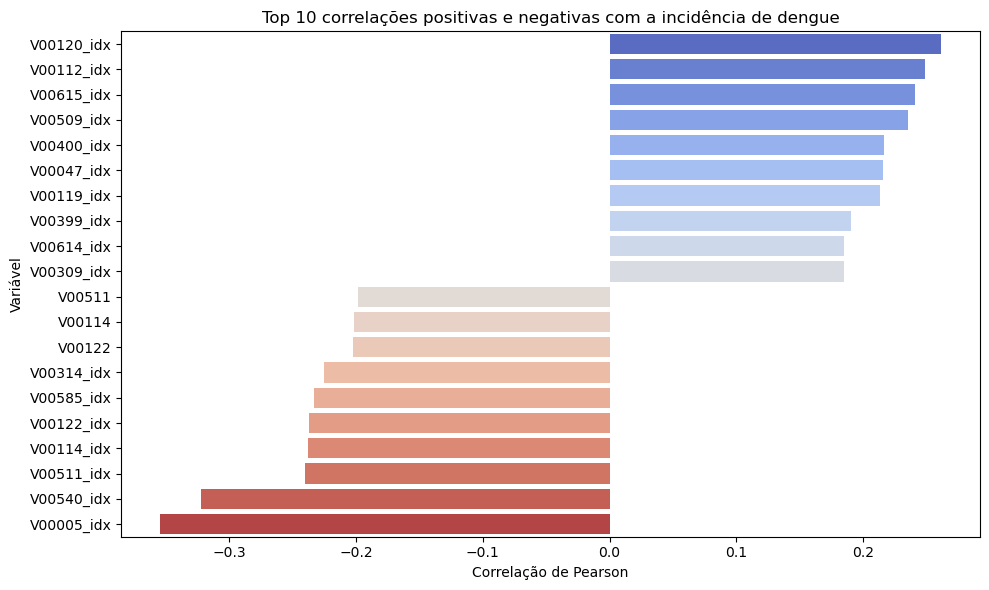

In [25]:
top_n = 10  # número de variáveis a exibir
print(f"\nTop {top_n} variáveis mais correlacionadas positivamente:")
print(correlacao_dengue.head(top_n))

print(f"\nTop {top_n} variáveis mais correlacionadas negativamente:")
print(correlacao_dengue.tail(top_n))

# === Gráfico de barras para as mais e menos correlacionadas ===
corr_a = correlacao_dengue.drop(alvo)
top_pos = corr_a.head(top_n)
top_neg = corr_a.tail(top_n)

# Concatenar para exibir juntas
corr_top = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_top.values, y=corr_top.index, palette="coolwarm")
plt.title(f"Top {top_n} correlações positivas e negativas com a incidência de dengue")
plt.xlabel("Correlação de Pearson")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

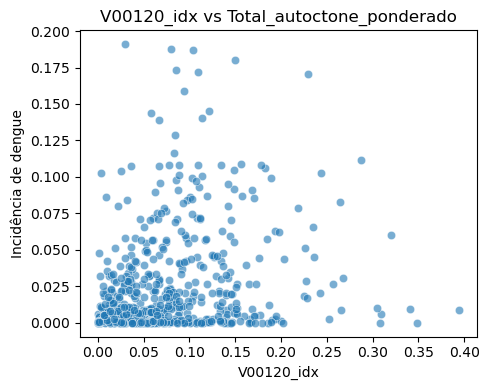

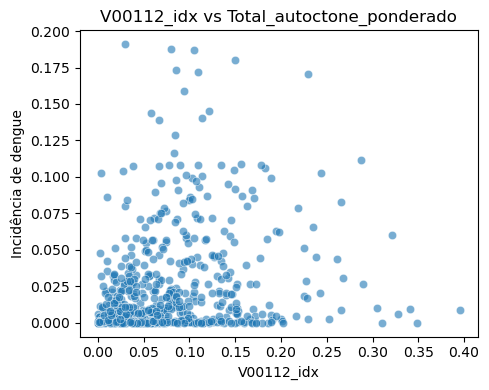

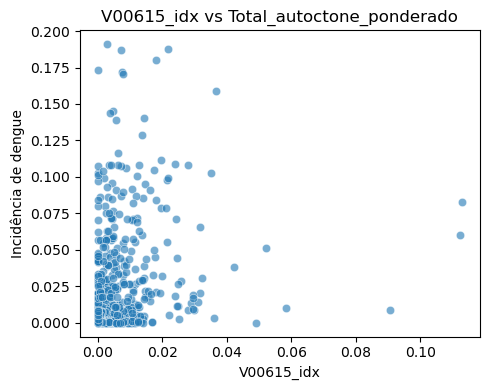

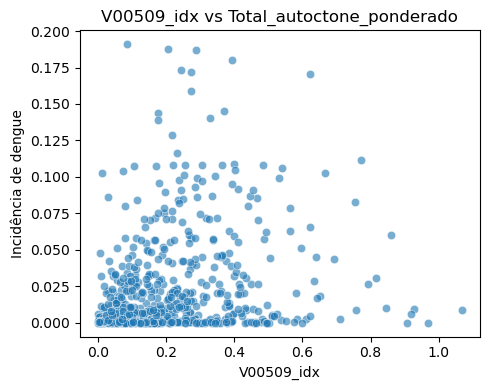

In [26]:
top_vars = correlacao_dengue.drop(alvo).head(4).index  # 4 variáveis mais correlacionadas
for var in top_vars:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=dados_pop[var], y=dados_pop[alvo], alpha=0.6)
    plt.title(f"{var} vs Total_autoctone_ponderado")
    plt.xlabel(f"{var}")
    plt.ylabel("Incidência de dengue")
    plt.tight_layout()
    plt.show()

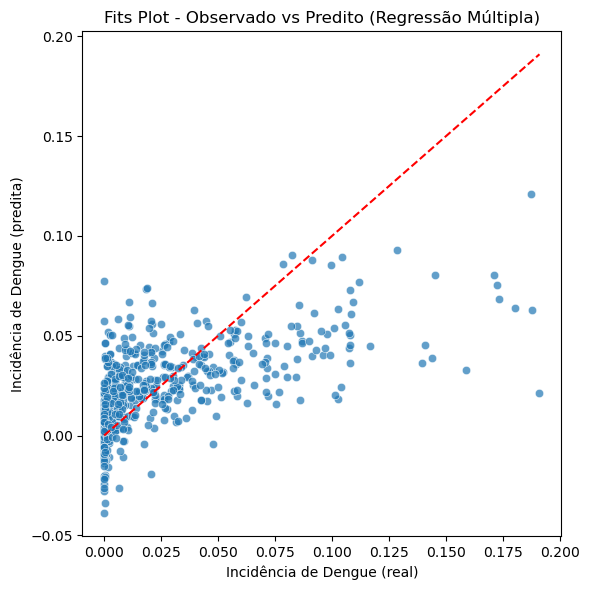

In [27]:
# === Gráfico Fits Plot (observado vs predito) ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred_multi, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Linha 45° ajustada
plt.xlabel("Incidência de Dengue (real)")
plt.ylabel("Incidência de Dengue (predita)")
plt.title("Fits Plot - Observado vs Predito (Regressão Múltipla)")
plt.tight_layout()
plt.show()

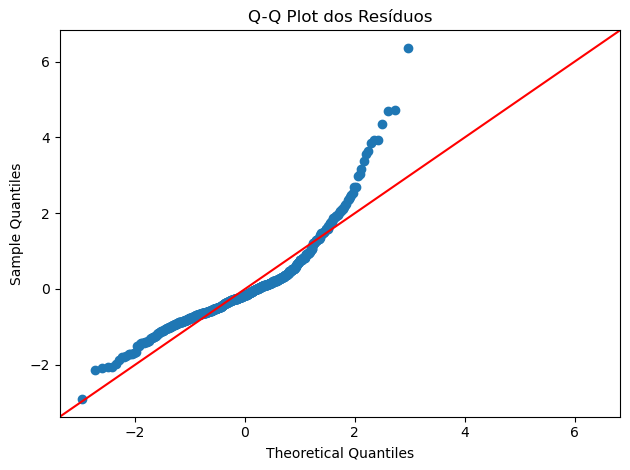

In [28]:
# === Q-Q Plot dos resíduos ===
residuos = y - y_pred_multi

sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q Plot dos Resíduos")
plt.tight_layout()
plt.show()

C:\Users\Nazivon Santos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


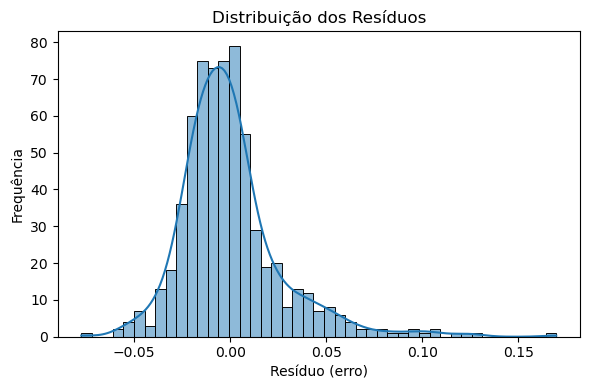

In [29]:
# === Histograma dos resíduos ===
plt.figure(figsize=(6, 4))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo (erro)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()